## Clustering

### IRIS dataset

In [50]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering, KMeans



In [51]:
df = pd.read_csv('iris/IRIS.csv')
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [52]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [53]:
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

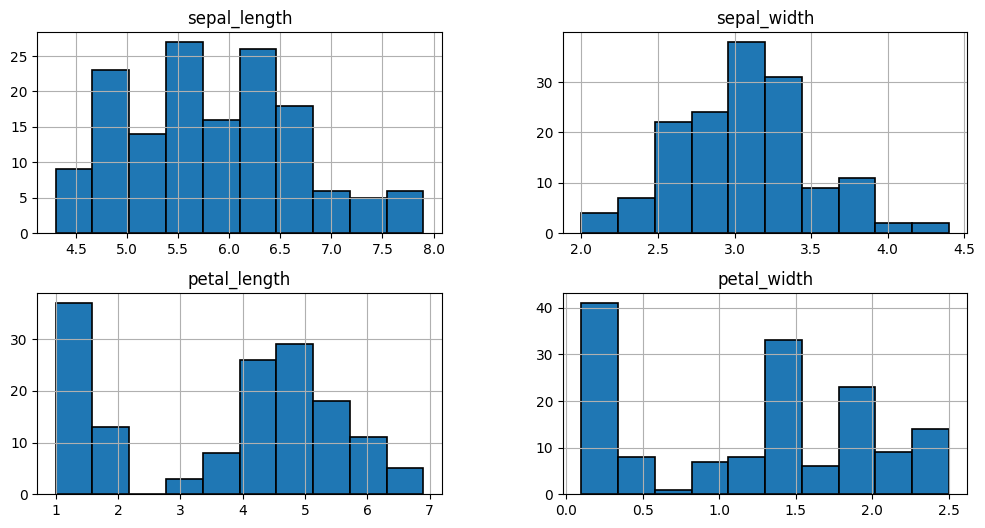

In [54]:
#subplots of all the data histograms
df.hist(edgecolor='black', linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()


/tmp/ipykernel_13893/1409808759.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y='sepal_length', data=df, palette=palette1)
/tmp/ipykernel_13893/1409808759.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y='sepal_width', data=df, palette=palette2)
/tmp/ipykernel_13893/1409808759.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y='petal_length', data=df, palette=palette3)
/tmp/ipykernel_13893/1409808759.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and wil

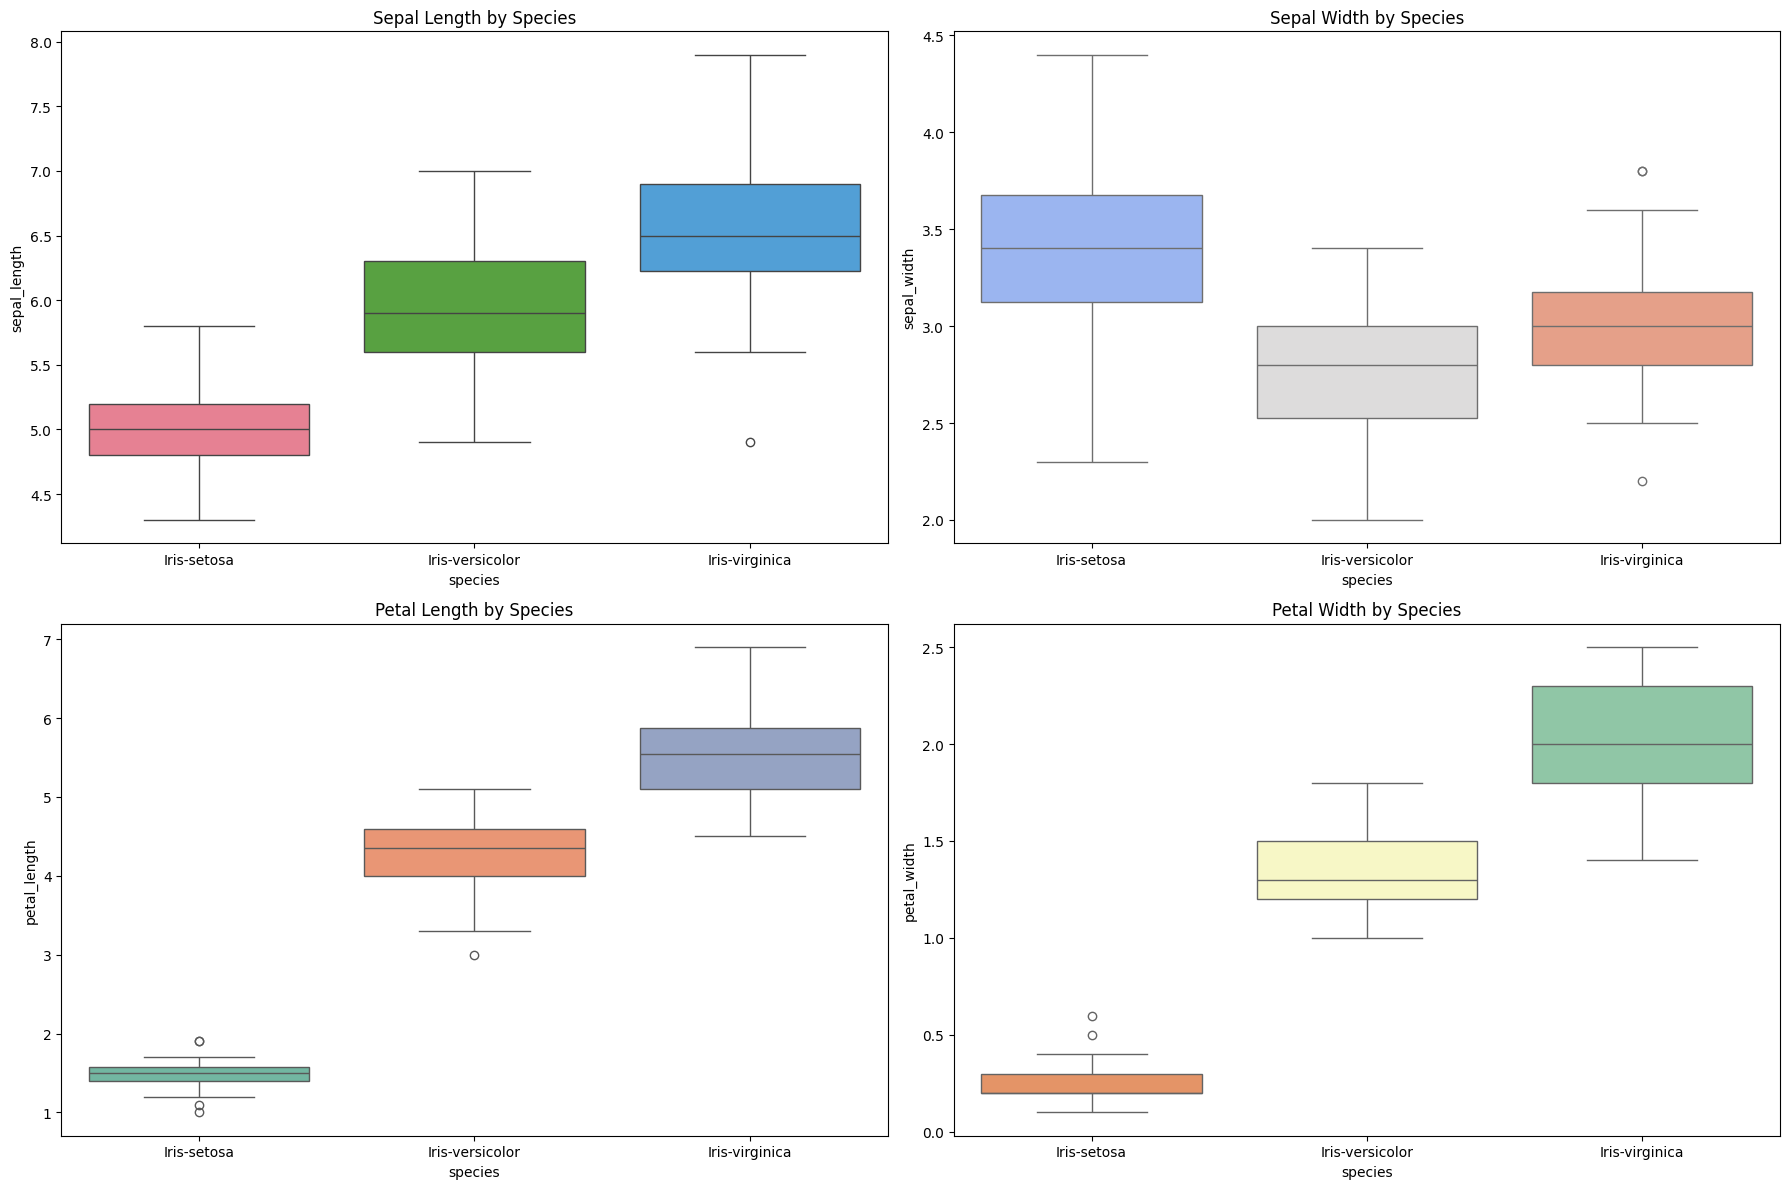

In [55]:
palette1 = sns.color_palette("husl", 3)
palette2 = sns.color_palette("coolwarm", 3)
palette3 = sns.color_palette("Set2", 3)
palette4 = sns.color_palette("Spectral", 3)

# Subplots of boxplots of all the data
plt.figure(figsize=(18,12))  # Increase the figure size for better spacing

# Create subplots
plt.subplot(2,2,1)
sns.boxplot(x='species', y='sepal_length', data=df, palette=palette1)
plt.title('Sepal Length by Species')

plt.subplot(2,2,2)
sns.boxplot(x='species', y='sepal_width', data=df, palette=palette2)
plt.title('Sepal Width by Species')

plt.subplot(2,2,3)
sns.boxplot(x='species', y='petal_length', data=df, palette=palette3)
plt.title('Petal Length by Species')

plt.subplot(2,2,4)
sns.boxplot(x='species', y='petal_width', data=df, palette=palette4)
plt.title('Petal Width by Species')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [56]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

### K-Means

In [57]:
# wccs fullform is within cluster sum of squares
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

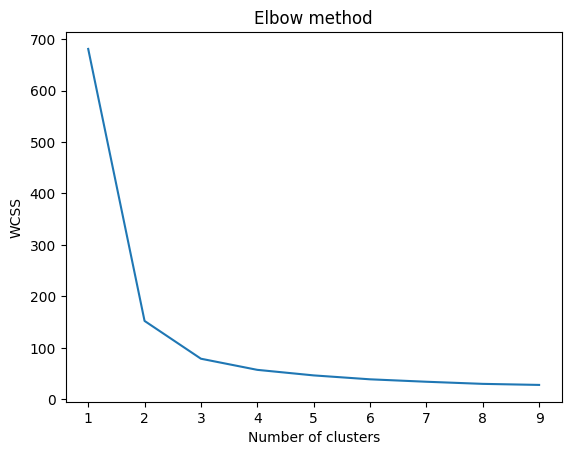

In [58]:
plt.plot(range(1, 10), wcss)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # within cluster sum of squares
plt.show()

In [59]:
# creating the k-means classifier with n_clusters being k, the number of clusters for the model
kmeans = KMeans(n_clusters = 3 , 
                init = 'k-means++', 
                max_iter = 300, 
                n_init = 10, 
                random_state = 0)
# fitting the model
y_kmeans = kmeans.fit_predict(X)


In [60]:
def plot_data_cluster_output(method, y_clusters, features,
                             output, k_clusters, x_axis, y_axis):
    """
    function plotting the data labeled by clusters and by output
    """
    # plotting the points labeled by the cluster
    # legend
    fig, (ax1,ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 8)
    colors = iter(cm.rainbow(np.linspace(0, 1, k_clusters)))
    
    for i in range(0,k_clusters):
        ax1.scatter(features.iloc[y_clusters == i, x_axis], features.iloc[y_clusters == i, y_axis], s = 30, color= next(colors), label = 'cluster ' + str(i))
    ax1.legend()
    
    # plotting the centroid
    if method=='kmeans':
        # plotting the centroids of the clusters
        ax1.scatter(kmeans.cluster_centers_[:, x_axis], kmeans.cluster_centers_[:,y_axis], s = 30, c = 'yellow', label = 'centroids')
    
    # title
    ax1.title.set_text(method + " clustering on " + features.columns[x_axis] + " and " + features.columns[y_axis])
    # x label
    ax1.set_xlabel(features.columns[x_axis])
    # y label
    ax1.set_ylabel(features.columns[y_axis])
    
    # preparing legend to get the same colour if the number of clusters is equal to the number of labels
    if len(output.unique())==k_clusters:
        # initialize labels vector
        labels=[None]*3
        
        # reordering labels
        for i in range(0,k_clusters):
            index_label=np.where(np.amax(pd.crosstab(y_kmeans, output).iloc[:,i].values)==pd.crosstab(y_kmeans, output).iloc[:,i].values)[0]
            labels[index_label[0]]=output.unique()[i]
    else:
        labels=output.unique()
    
    plt.figure(2)
    colors = iter(cm.rainbow(np.linspace(0, 1, len(output.unique()))))
    
    # plotting the points labeled by the label
    for i in labels:
        ax2.scatter(features.iloc[output.values == i, x_axis], features.iloc[output.values == i, y_axis], s = 30, color = next(colors), label = i)   
    ax2.legend()
    # title
    ax2.title.set_text("Data labeled on species depending on " + features.columns[x_axis] + " and " + features.columns[y_axis])
    # x label
    ax2.set_xlabel(features.columns[x_axis])
    # y label
    ax2.set_ylabel(features.columns[y_axis])

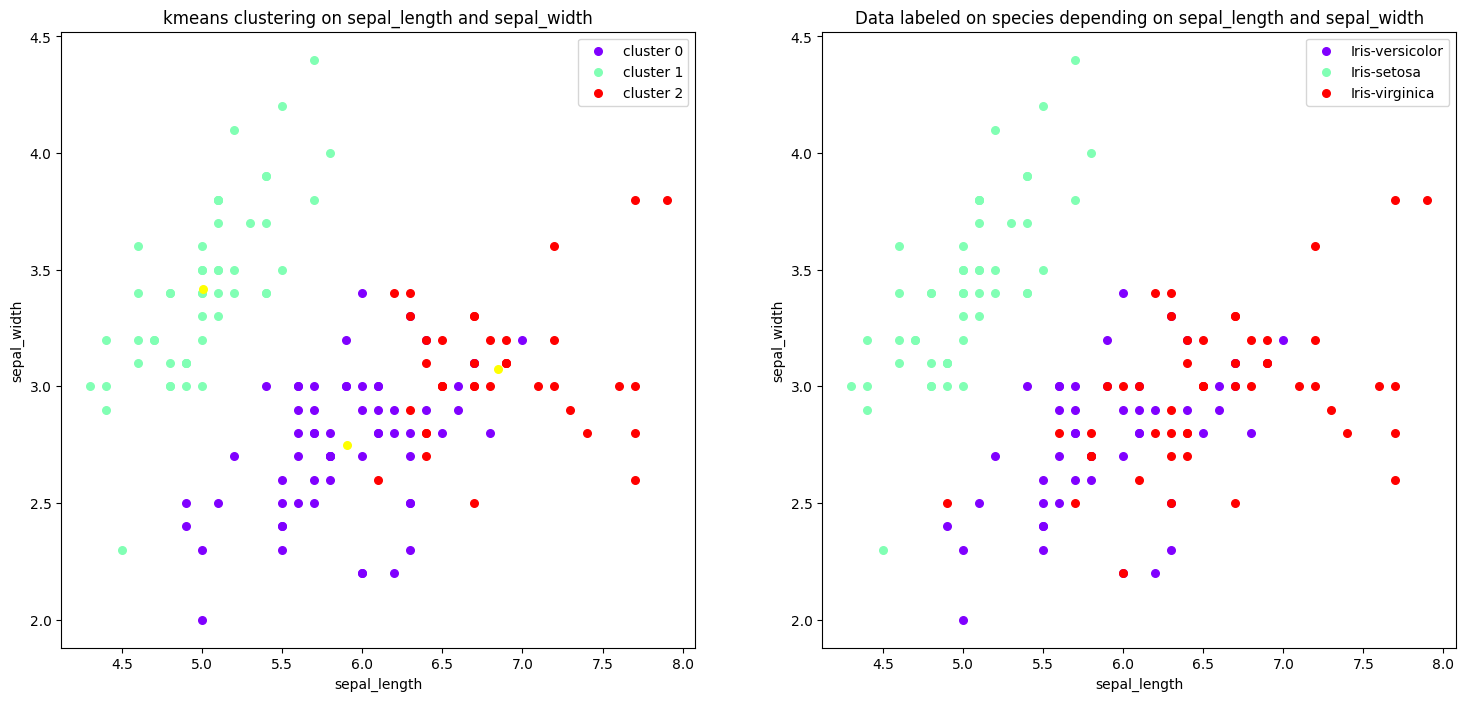

<Figure size 640x480 with 0 Axes>

In [61]:
plot_data_cluster_output('kmeans', y_kmeans, X, y, 3, 0, 1)

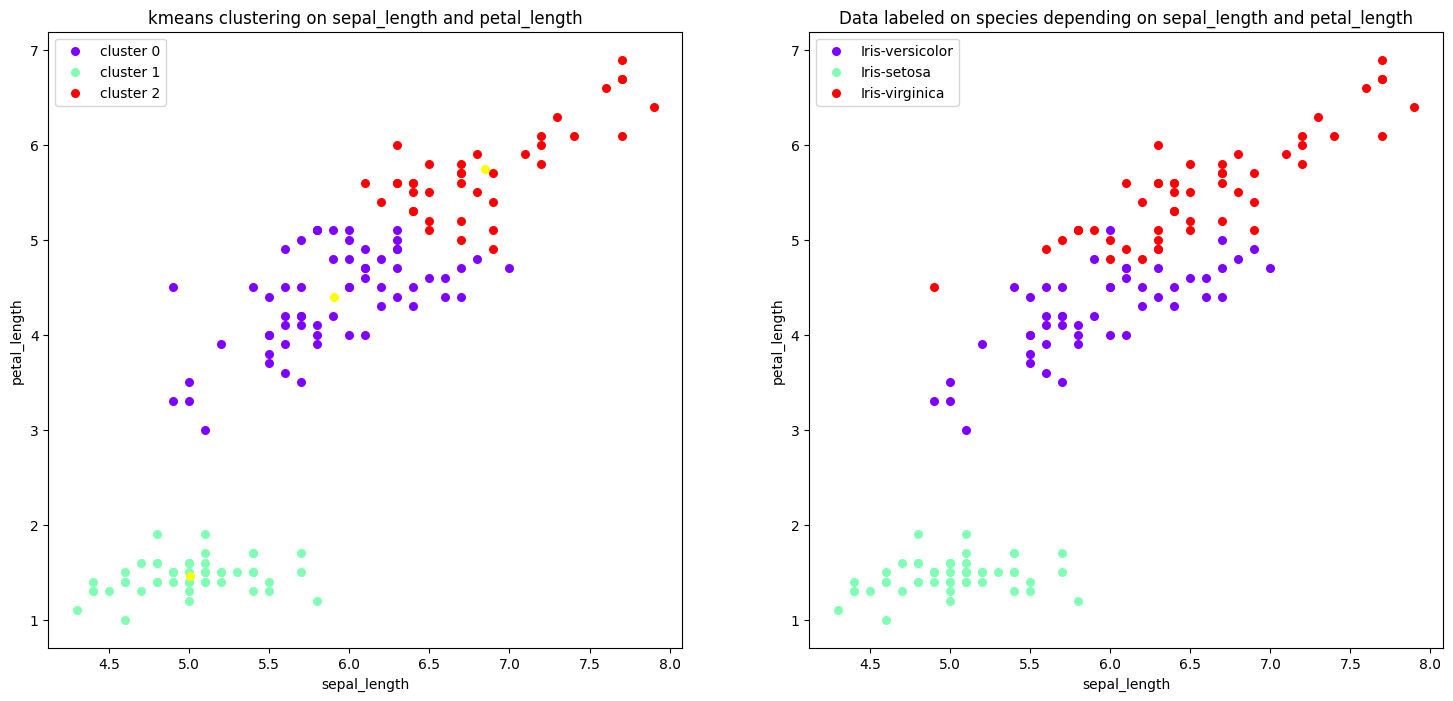

<Figure size 640x480 with 0 Axes>

In [62]:
plot_data_cluster_output('kmeans', y_kmeans, X, y, 3, 0, 2)

In [63]:
pd.crosstab(y_kmeans, y)

species,Iris-setosa,Iris-versicolor,Iris-virginica
row_0,,,
0,0,48,14
1,50,0,0
2,0,2,36


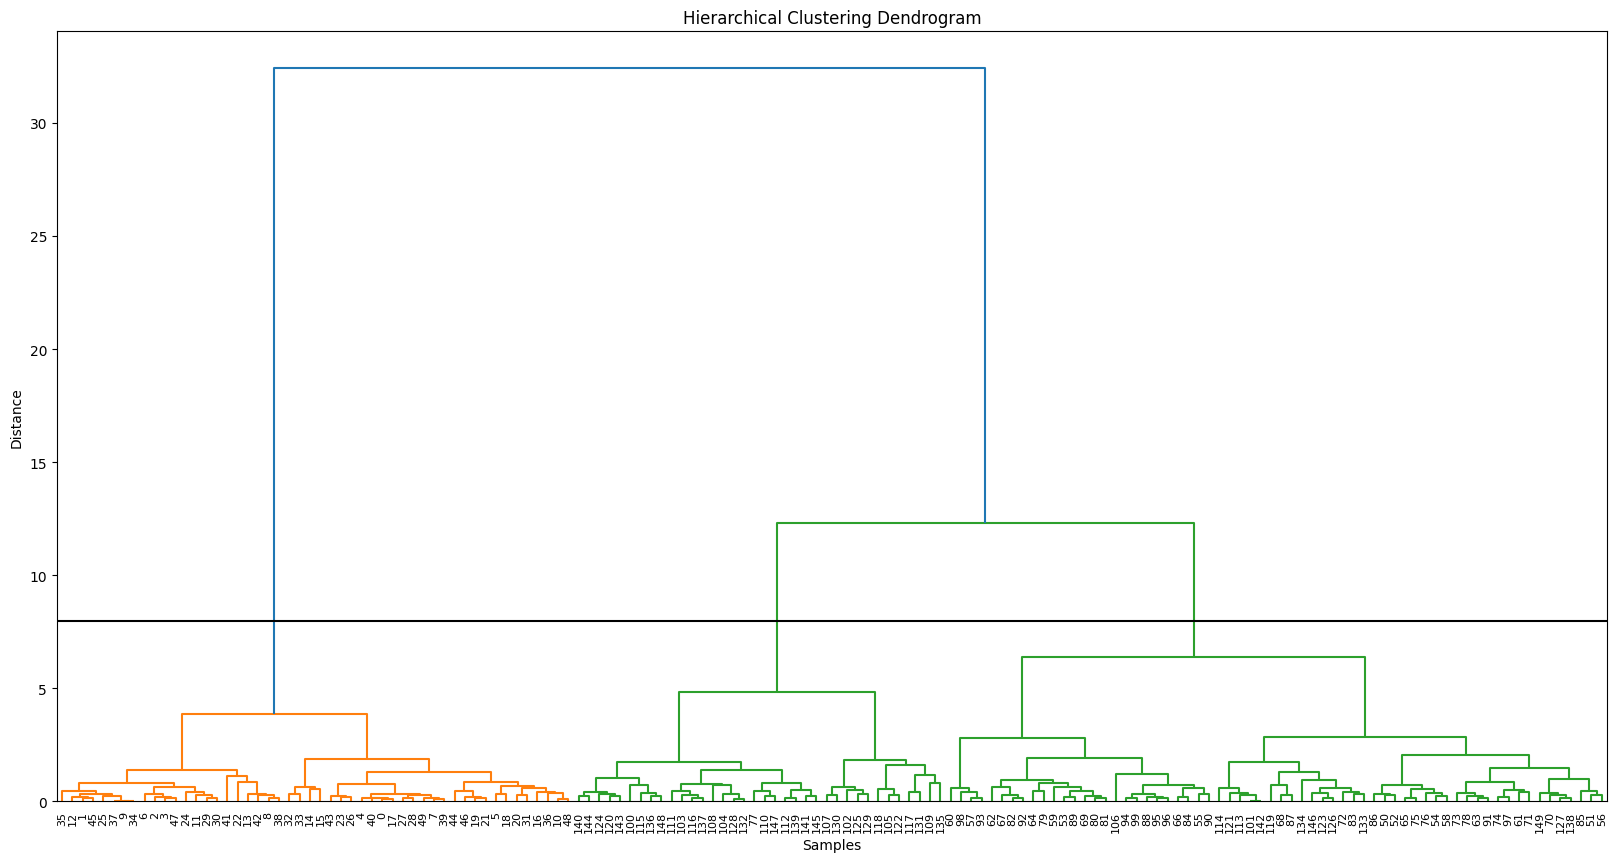

In [64]:
#generate the linkage matrix
Z = linkage(X, 'ward')

# we set the cut off, the level where we decide to cluster the data, we select the distance level where the line does not intercept any node.
# try different levels to understand this concept
max_d = 8               

plt.figure(figsize=(20, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
dendrogram(
    Z,
    truncate_mode='lastp', 
    p=150,                  # indicates how many final leafs you want to have ( ideally the number of samples)
    leaf_rotation=90.,      # rotates the x axis labels
    leaf_font_size=8.,      # font size for the x axis labels
)
plt.axhline(y=max_d, c='k')
plt.show()

## World Happiness Report

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('archive/2019.csv')

In [5]:
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [6]:
df.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [8]:
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


### Creating a Heatmap to Visualize

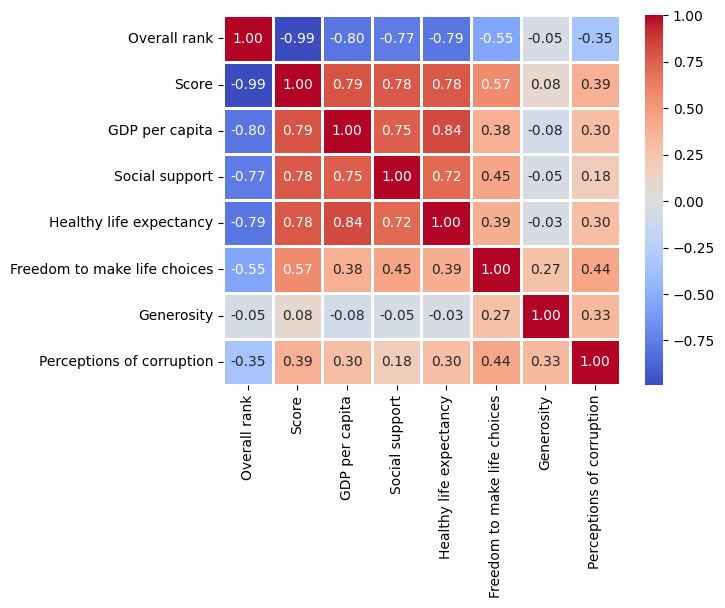

In [10]:
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)
plt.show()

### Performing PairPlot

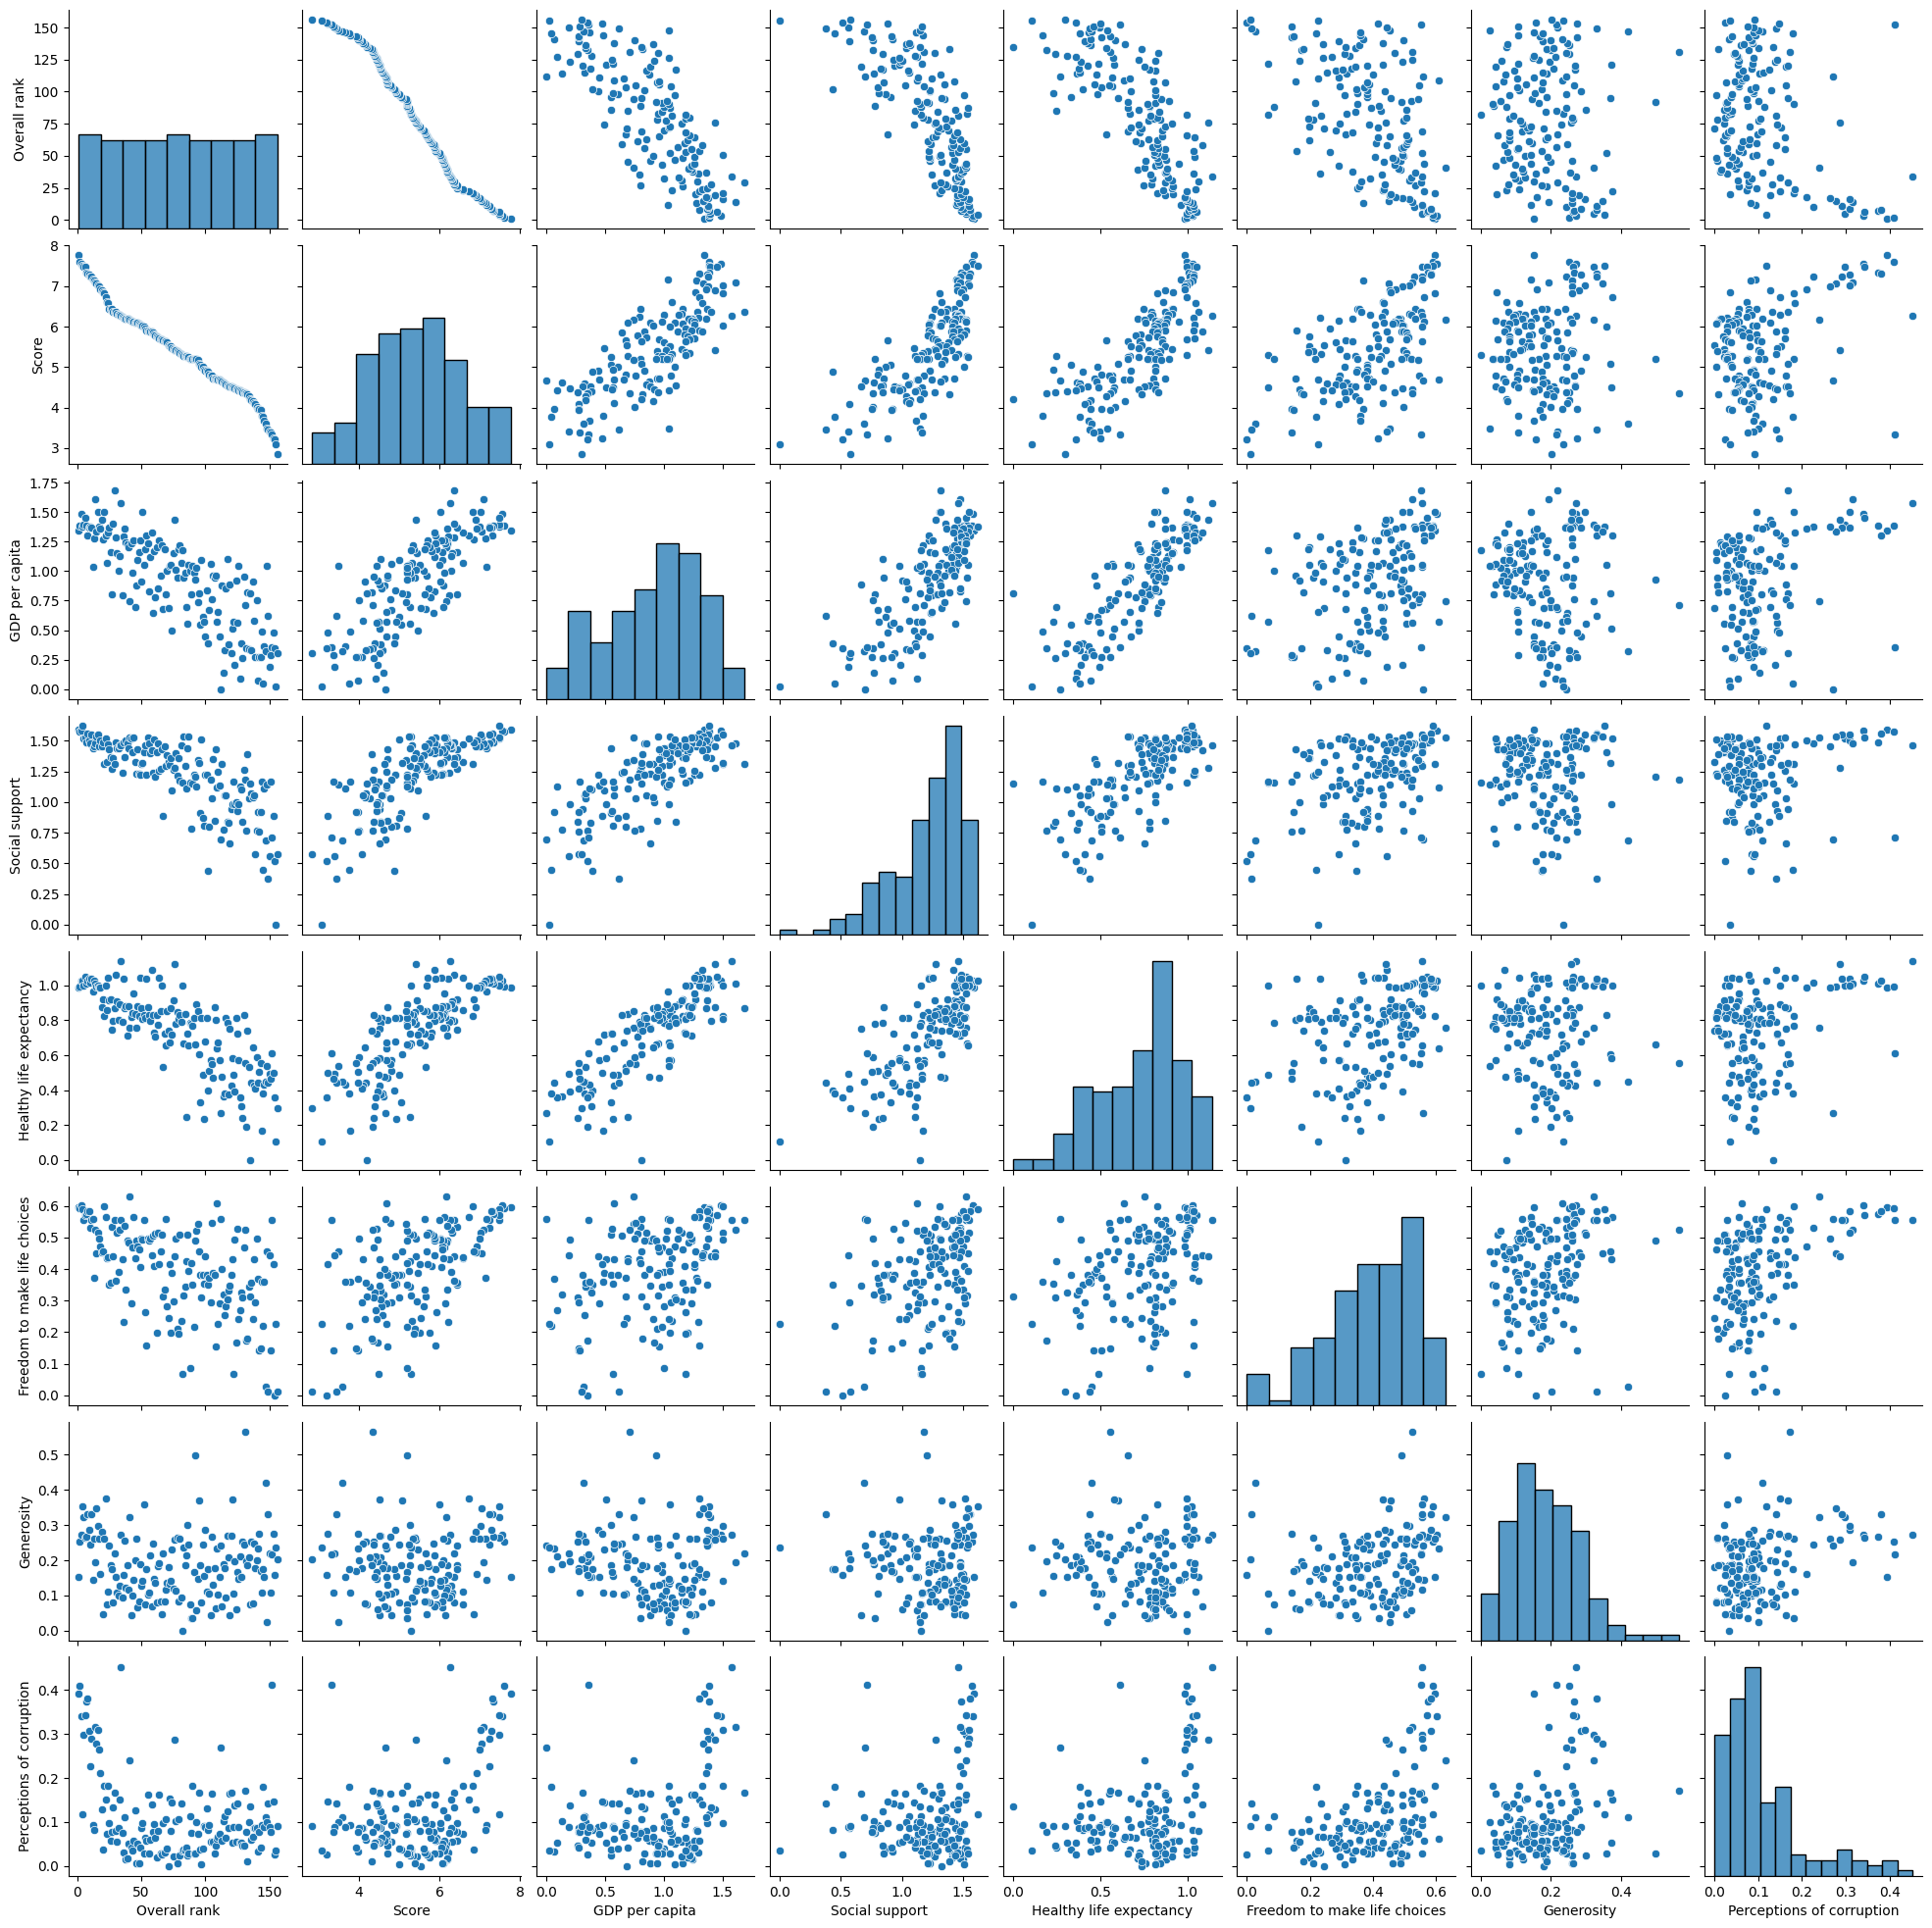

In [12]:
sns.pairplot(df)

### Checking Distribution of each by plotting histogram

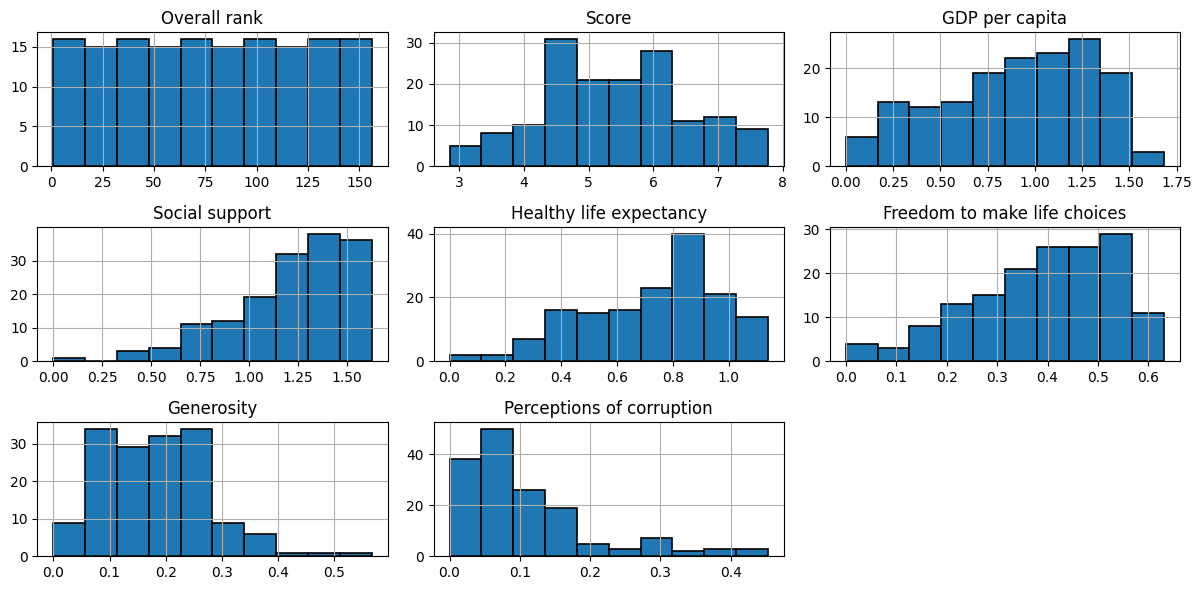

In [14]:
#we need to plot histograms for all the columns
df.hist(edgecolor='black', linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.tight_layout()
plt.show()

### Top 10 Countries By Histogram

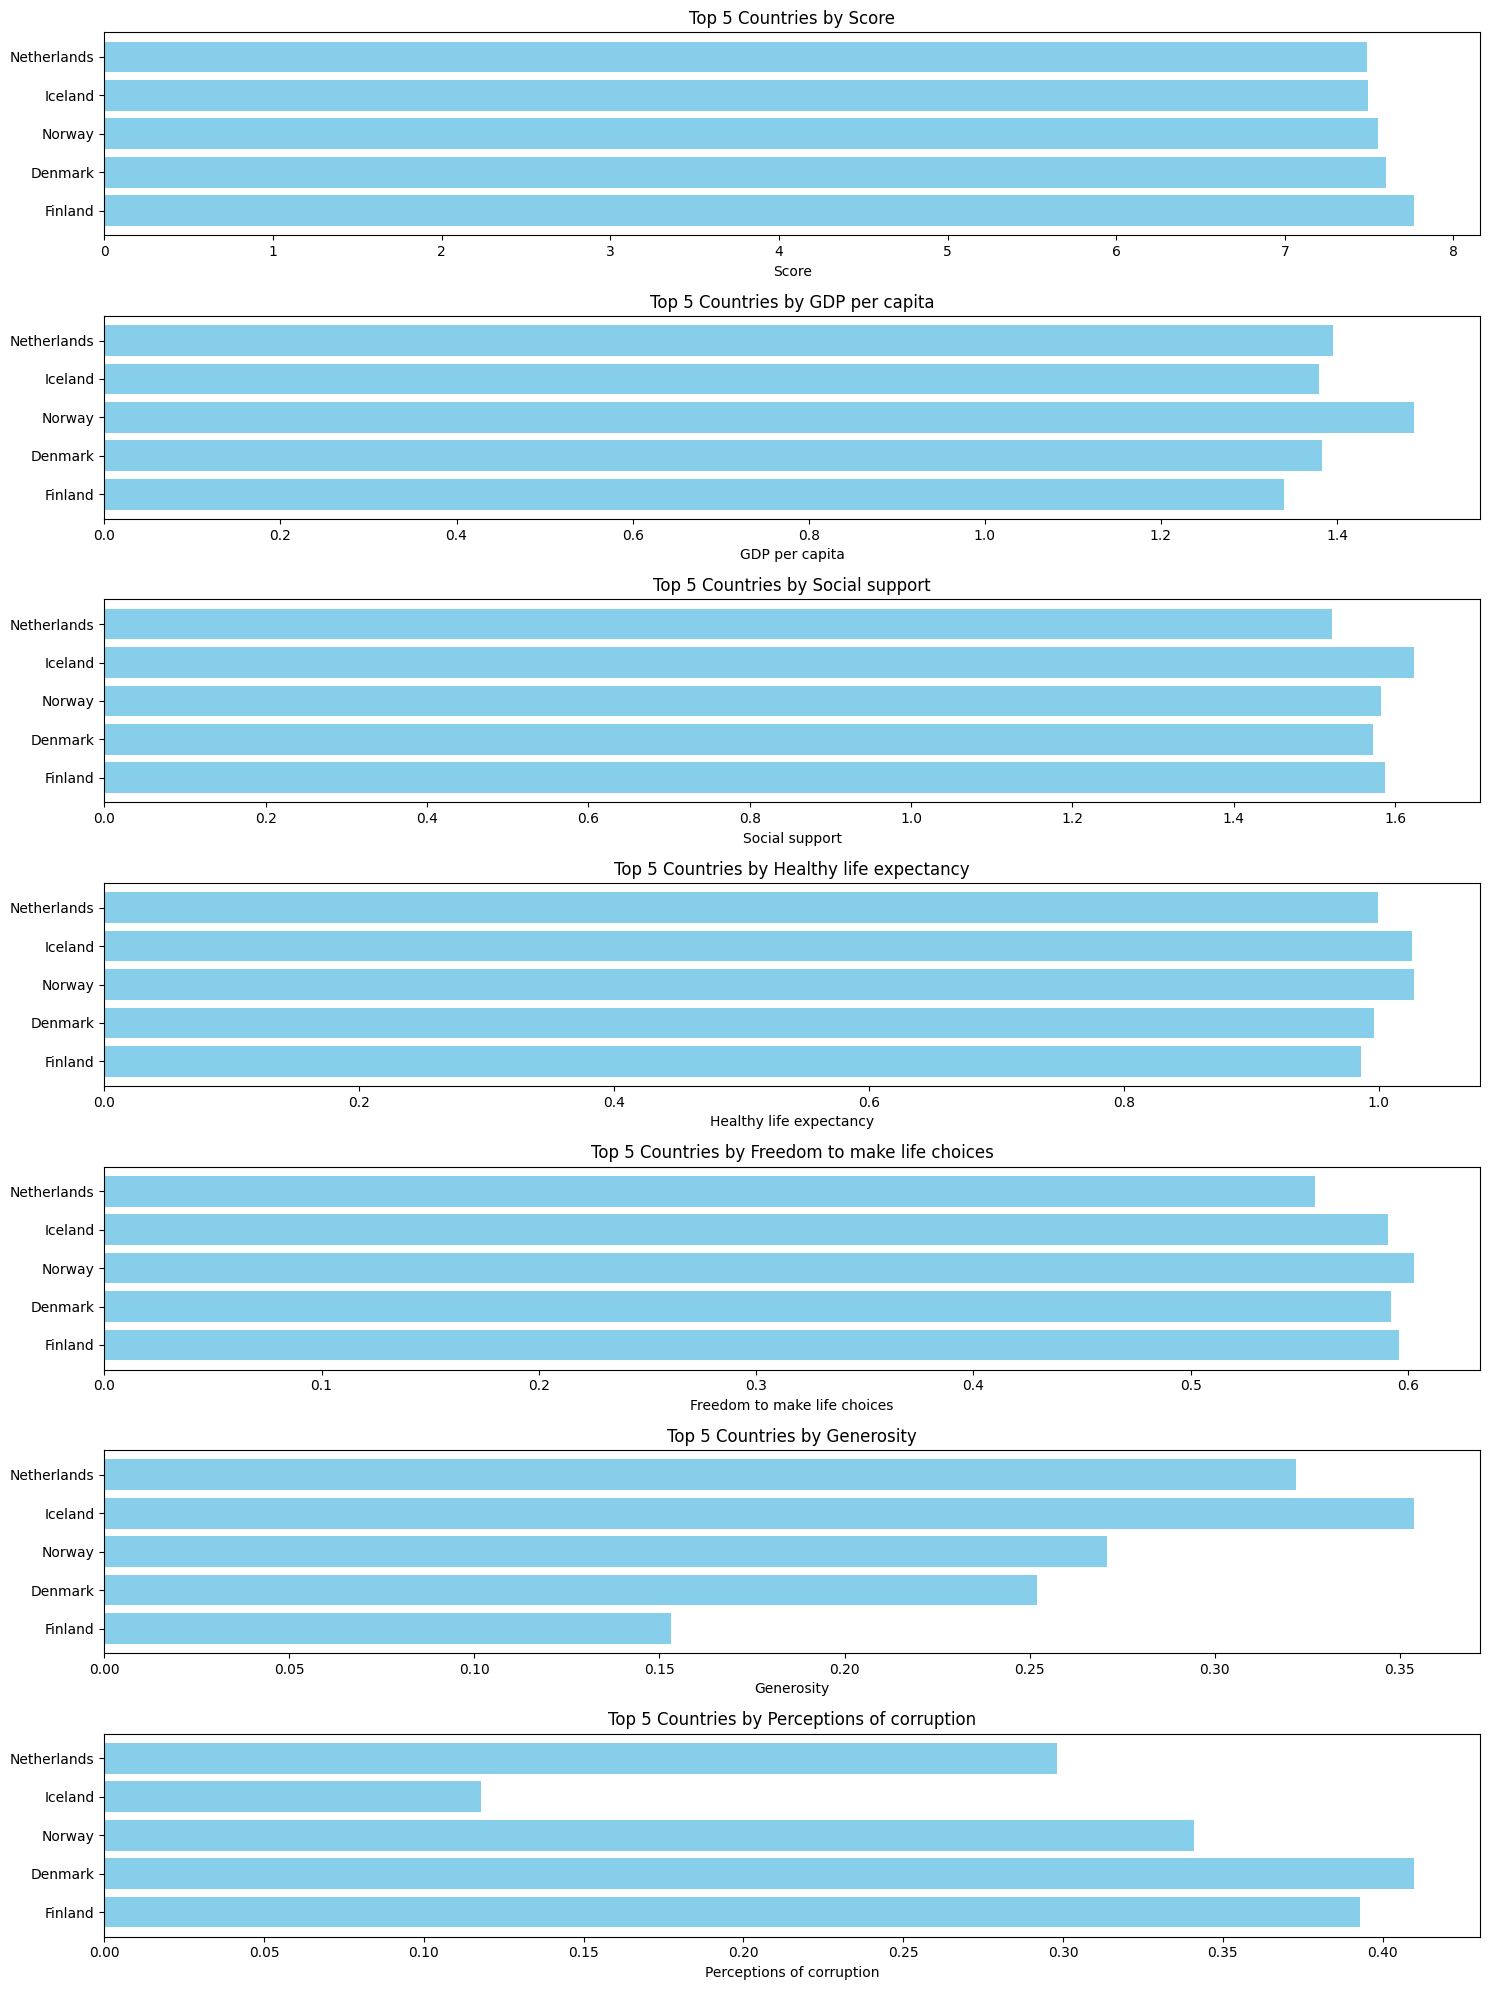

In [17]:
### Plot barchart for top 5 countries in horizontal bar chart with country vs each columns
# Extract top 5 countries based on 'Score'
top_5_countries = df.nlargest(5, 'Score')['Country or region']

# Plot horizontal bar charts for each column
columns = ['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 
           'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

plt.figure(figsize=(15, 20))

for i, column in enumerate(columns, 1):
    plt.subplot(len(columns), 1, i)
    top_5_values = df.nlargest(5, 'Score')[column]
    plt.barh(top_5_countries, top_5_values, color='skyblue')
    plt.xlabel(column)
    plt.title(f'Top 5 Countries by {column}')

plt.tight_layout()
plt.show()

### HIERARCHICAL CLUSTERING

In [19]:
original=df.drop(['Country or region','Overall rank'],axis=1)

But before applying Hierarchical Clustering, we have to normalize the data so that the scale of each variable is the same. 

In [20]:
from sklearn.preprocessing import normalize
data_scaled = normalize(original)
data_scaled = pd.DataFrame(data_scaled, columns=original.columns)
datasc=data_scaled.copy()
data_scaled.head()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,0.955020,0.164722,0.195085,0.121206,0.073264,0.018808,0.048310
1,0.952077,0.173253,0.197055,0.124772,0.074162,0.031569,0.051362
2,0.948783,0.186893,0.198699,0.129117,0.075737,0.034038,0.042830
3,0.949879,0.174918,0.205845,0.130048,0.074910,0.044870,0.014957
4,0.952236,0.177527,0.193550,0.127041,0.070833,0.040948,0.037896


Let’s draw the dendrogram(A dendrogram is a tree-like diagram that records the sequences of merges or splits)to help us decide the number of clusters for the problem

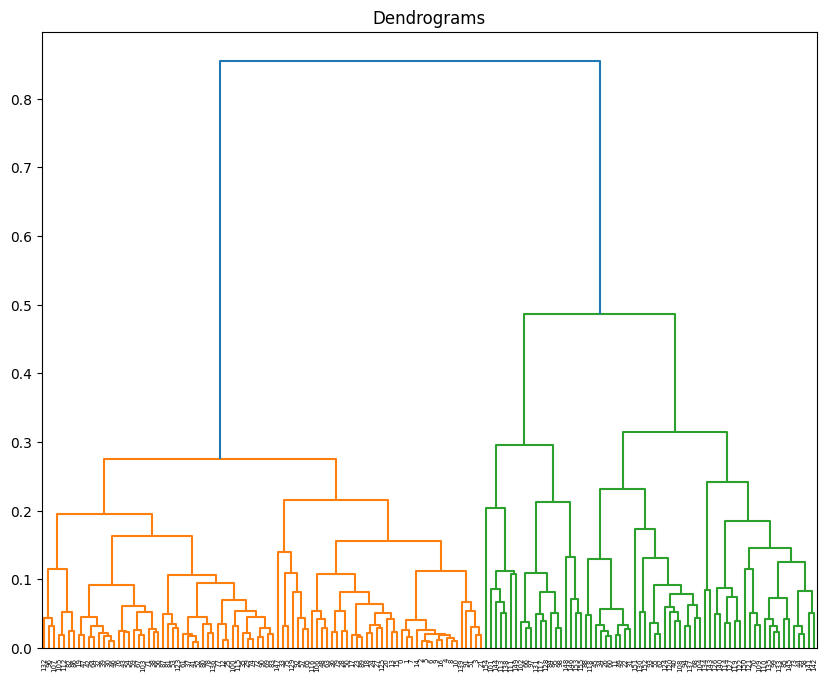

In [24]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 8))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))



We have two clusters as this line cuts the dendrogram at two points. Let’s now apply hierarchical clustering for 2 clusters


In [26]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2,linkage='ward')  
cluster.fit_predict(data_scaled)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0])

0 belongs to cluster 1 and 1 belongs to cluter 2

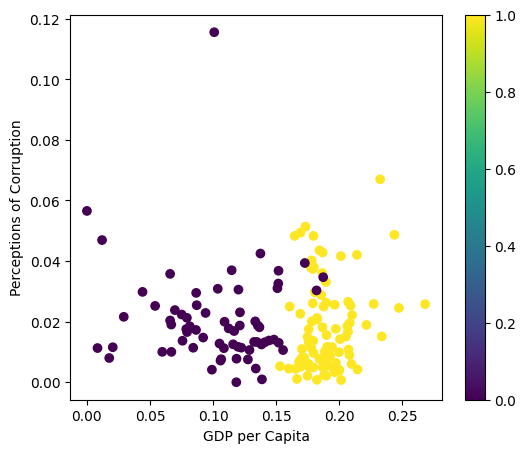

In [27]:
plt.figure(figsize=(6, 5))  
plt.scatter(data_scaled['GDP per capita'], data_scaled['Perceptions of corruption'], c=cluster.labels_) 
plt.xlabel('GDP per Capita')
plt.ylabel('Perceptions of Corruption')
plt.colorbar()


## Using PCA to Reduce the Dimension of Data

In [28]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [40]:
data_scaled.head()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,0.955020,0.164722,0.195085,0.121206,0.073264,0.018808,0.048310
1,0.952077,0.173253,0.197055,0.124772,0.074162,0.031569,0.051362
2,0.948783,0.186893,0.198699,0.129117,0.075737,0.034038,0.042830
3,0.949879,0.174918,0.205845,0.130048,0.074910,0.044870,0.014957
4,0.952236,0.177527,0.193550,0.127041,0.070833,0.040948,0.037896


In [41]:
clustering_kmeans = KMeans(n_clusters=2)
data_scaled['clusters'] = clustering_kmeans.fit_predict(data_scaled)

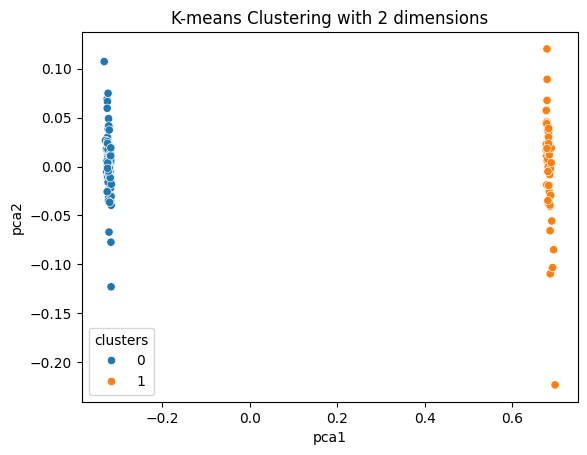

In [42]:
pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(data_scaled)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=data_scaled['clusters'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

In [45]:
data_scaled

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,clusters
0,0.955020,0.164722,0.195085,0.121206,0.073264,0.018808,0.048310,0
1,0.952077,0.173253,0.197055,0.124772,0.074162,0.031569,0.051362,0
2,0.948783,0.186893,0.198699,0.129117,0.075737,0.034038,0.042830,0
3,0.949879,0.174918,0.205845,0.130048,0.074910,0.044870,0.014957,0
4,0.952236,0.177527,0.193550,0.127041,0.070833,0.040948,0.037896,0
...,...,...,...,...,...,...,...,...
151,0.937353,0.100933,0.199897,0.172626,0.156038,0.061010,0.115553,1
152,0.933884,0.137582,0.255799,0.144230,0.120529,0.079775,0.042489,0
153,0.974420,0.106477,0.157282,0.109824,0.000000,0.048067,0.007606,1
154,0.993810,0.008381,0.000000,0.033847,0.072529,0.075753,0.011282,1
